In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
import json
import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics
import folium
from folium import plugins
import missingno as mnso
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/데이터 처리/3. 공공자전거 대여소 정보(22.06월 기준).csv", encoding='utf-8')

In [ ]:
data.head()

,대여소번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치시기,LCD,QR,운영방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2022-05-03,NaN,15.0,QR
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2022-05-03,NaN,14.0,QR
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2022-05-12,NaN,13.0,QR
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,NaN,5.0,QR
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2022-05-12,NaN,12.0,QR


In [ ]:
datainfo(data)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
대여소번호,int64,2653,2653,0,0.000000
보관소(대여소)명,object,2653,2650,0,0.000000
소재지(위치),object,2653,25,0,0.000000
상세주소,object,2653,2552,0,0.000000
위도,float64,2653,2572,0,0.000000
경도,float64,2653,2570,0,0.000000
설치시기,object,2652,457,1,0.037693
LCD,float64,1290,27,1363,51.375801
QR,float64,1378,33,1275,48.058801
운영방식,object,2653,2,0,0.000000


In [ ]:
#필요없는 컬럼 탈락
data.drop(columns=['보관소(대여소)명'],inplace=True)
data.drop(columns=['상세주소'],inplace=True)
data.drop(columns=['위도'],inplace=True)
data.drop(columns=['경도'],inplace=True)
data.drop(columns=['설치시기'],inplace=True)

In [ ]:
data =data.fillna(0)

In [ ]:
data.head()

,대여소번호,소재지(위치),LCD,QR,운영방식
0,102,마포구,0.0,15.0,QR
1,103,마포구,0.0,14.0,QR
2,104,마포구,0.0,13.0,QR
3,105,마포구,0.0,5.0,QR
4,106,마포구,0.0,12.0,QR


In [ ]:
data['대여소별 자전거 대수'] = data['LCD']+data['QR']

In [ ]:
data.drop(columns=['LCD'], inplace=True)
data.drop(columns=['QR'], inplace=True)
data.drop(columns=['운영방식'], inplace=True)

In [ ]:
data.head()

,대여소번호,소재지(위치),대여소별 자전거 대수
0,102,마포구,15.0
1,103,마포구,14.0
2,104,마포구,13.0
3,105,마포구,5.0
4,106,마포구,12.0


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.01.csv', encoding='utf-8')

In [ ]:
df1.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.9,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0,0,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [ ]:
datainfo(df1)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
대여일자,object,718857,30,0,0.000000
대여시간,int64,718857,24,0,0.000000
대여소번호,int64,718857,2188,0,0.000000
대여소명,object,718857,2188,0,0.000000
대여구분코드,object,718857,4,0,0.000000
성별,object,401235,4,317622,44.184309
연령대코드,object,718857,7,0,0.000000
이용건수,int64,718857,14,0,0.000000
운동량,object,718857,51422,0,0.000000
탄소량,object,718857,1333,0,0.000000


In [ ]:
df1.shape

(718857, 12)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.02.csv', encoding='utf-8')

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.03.csv', encoding='utf-8')

In [ ]:
df4 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.04.csv', encoding='utf-8')

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.05.csv', encoding='utf-8')

In [ ]:
df6 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.06.csv', encoding='utf-8')

In [ ]:
df7 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.07.csv', encoding='utf-8')

In [ ]:
df8 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.08.csv', encoding='utf-8')

In [ ]:
df9 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.09.csv', encoding='utf-8')

In [ ]:
df10 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.10.csv', encoding='utf-8')

In [ ]:
df11 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.11.csv', encoding='utf-8')

In [ ]:
df12 = pd.read_csv('/content/drive/MyDrive/데이터 처리/서울특별시 공공자전거 이용정보(시간대별)_21.12.csv', encoding='utf-8')

In [ ]:
df12.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여일자    1048575 non-null  object 
 1   대여시간    1048575 non-null  int64  
 2   대여소번호   1048575 non-null  int64  
 3   대여소명    1048575 non-null  object 
 4   대여구분코드  1048575 non-null  object 
 5   성별      635255 non-null   object 
 6   연령대코드   1048575 non-null  object 
 7   이용건수    1048575 non-null  int64  
 8   운동량     1048575 non-null  object 
 9   탄소량     1048575 non-null  object 
 10  이동거리    1048575 non-null  float64
 11  사용시간    1048575 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 565.3 MB


In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df = pd.concat([df, df3])

In [ ]:
df = pd.concat([df, df4])

In [ ]:
df = pd.concat([df, df5])

In [ ]:
df = pd.concat([df, df6])

In [ ]:
df = pd.concat([df, df7])

In [ ]:
df = pd.concat([df, df8])

In [ ]:
df = pd.concat([df, df9])

In [ ]:
df = pd.concat([df, df10])

In [ ]:
df = pd.concat([df, df11])

In [ ]:
df = pd.concat([df, df12])

In [ ]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.9,0.23,992.78,13.0
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10.0
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0,0,0.00,7.0
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14.0
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12253182 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    object 
 8   운동량     object 
 9   탄소량     object 
 10  이동거리    float64
 11  사용시간    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.2+ GB


In [ ]:
#weather = pd.read_csv('/content/drive/MyDrive/데이터 처리/SURFACE_ASOS_108_HR_2021_2021_2022.csv', encoding='utf-8')

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/데이터 처리/SURFACE_ASOS_108_HR_2021_2021_2022_1.csv', encoding='utf-8')

In [ ]:
weather.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,108,2021-01-01 0:00,-8.3,NaN,1.8,66
1,108,2021-01-01 1:00,-8.7,NaN,2.4,68
2,108,2021-01-01 2:00,-9.1,NaN,1.6,69
3,108,2021-01-01 3:00,-9.3,NaN,1.1,70
4,108,2021-01-01 4:00,-9.3,NaN,0.3,71


In [ ]:
weather = weather.fillna(0.0)

In [ ]:
weather['일시'] = weather['일시'].astype('datetime64[ns]')
weather['월'] = weather['일시'].dt.month
weather['일'] = weather['일시'].dt.day
weather['대여시간'] = weather['일시'].dt.hour

In [ ]:
weather.drop(columns=['지점'], inplace=True)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   일시       8760 non-null   datetime64[ns]
 1   기온(°C)   8760 non-null   float64       
 2   강수량(mm)  8760 non-null   float64       
 3   풍속(m/s)  8760 non-null   float64       
 4   습도(%)    8760 non-null   int64         
 5   월        8760 non-null   int64         
 6   일        8760 non-null   int64         
 7   대여시간     8760 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 547.6 KB


In [ ]:
df['대여일자'] = pd.to_datetime(df['대여일자'], errors = 'coerce')

In [ ]:
df['이용건수'] = pd.to_numeric(df['이용건수'], errors = 'coerce')

In [ ]:
df.drop(columns=['대여구분코드'], inplace=True)
df.drop(columns=['성별'], inplace=True)
df.drop(columns=['연령대코드'], inplace=True)
df.drop(columns=['운동량'], inplace=True)

In [ ]:
df.drop(columns=['탄소량'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12253182 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여소번호   int64         
 3   대여소명    object        
 4   이용건수    float64       
 5   이동거리    float64       
 6   사용시간    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 747.9+ MB


In [ ]:
df['월'] = df['대여일자'].dt.month
df['일'] = df['대여일자'].dt.day
df['요일'] = df['대여일자'].dt.dayofweek
df.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리,사용시간,월,일,요일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,2.0,992.78,13.0,1,1,4
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,1.0,1127.50,10.0,1,1,4
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,1.0,0.00,7.0,1,1,4
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,1.0,1658.34,14.0,1,1,4
4,2021-01-01,0,536,536. 행당역 2번출구 앞,1.0,743.88,5.0,1,1,4


In [ ]:
df = df.merge(weather, on = ['월', '일', '대여시간'])

In [ ]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리,사용시간,월,일,요일,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,2.0,992.78,13.0,1,1,4,2021-01-01,-8.3,0.0,1.8,66
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,1.0,1127.50,10.0,1,1,4,2021-01-01,-8.3,0.0,1.8,66
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,1.0,0.00,7.0,1,1,4,2021-01-01,-8.3,0.0,1.8,66
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,1.0,1658.34,14.0,1,1,4,2021-01-01,-8.3,0.0,1.8,66
4,2021-01-01,0,536,536. 행당역 2번출구 앞,1.0,743.88,5.0,1,1,4,2021-01-01,-8.3,0.0,1.8,66


In [ ]:
df = df.merge(data, on = '대여소번호')

In [ ]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리,사용시간,월,일,요일,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),소재지(위치),대여소별 자전거 대수
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,2.0,992.78,13.0,1,1,4,2021-01-01 00:00:00,-8.3,0.0,1.8,66,성북구,10.0
1,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,1.0,283.72,1.0,1,1,4,2021-01-01 00:00:00,-8.3,0.0,1.8,66,성북구,10.0
2,2021-01-01,2,1347,1347. 길음래미안아파트817동 상가 앞,1.0,1839.04,37.0,1,1,4,2021-01-01 02:00:00,-9.1,0.0,1.6,69,성북구,10.0
3,2021-01-01,2,1347,1347. 길음래미안아파트817동 상가 앞,2.0,1912.72,73.0,1,1,4,2021-01-01 02:00:00,-9.1,0.0,1.6,69,성북구,10.0
4,2021-01-01,5,1347,1347. 길음래미안아파트817동 상가 앞,1.0,7134.79,47.0,1,1,4,2021-01-01 05:00:00,-9.7,0.0,1.9,72,성북구,10.0


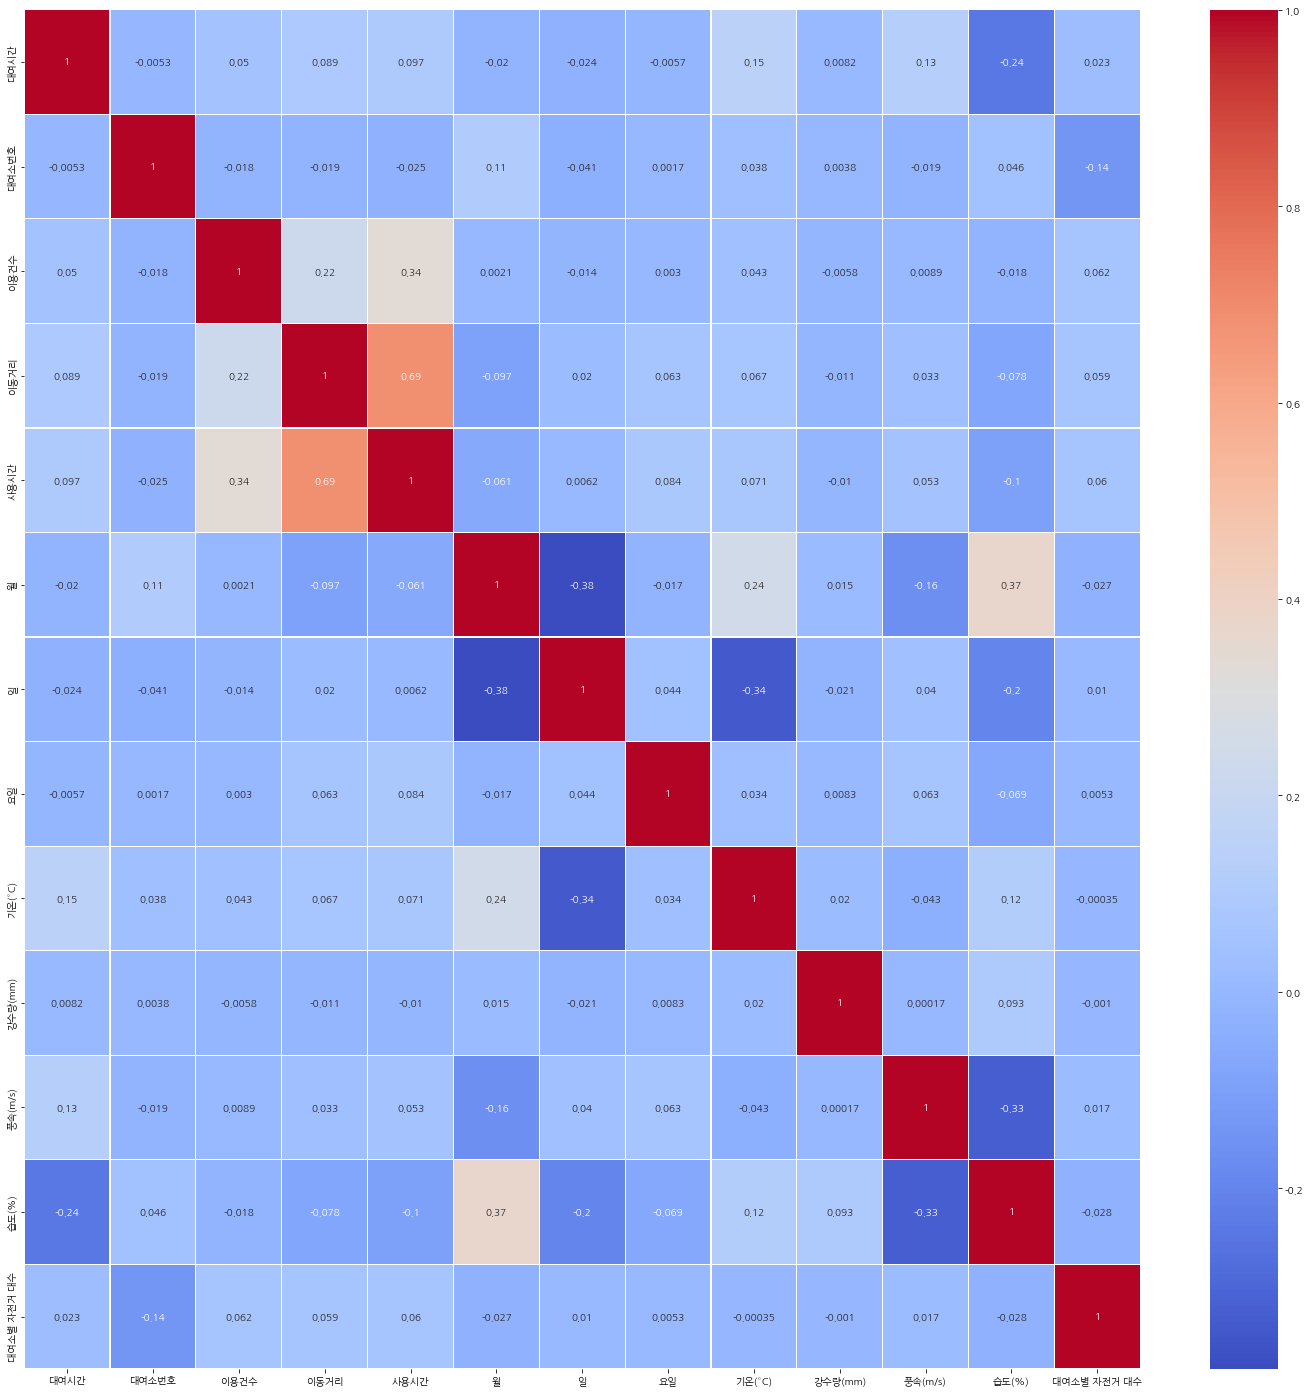

In [ ]:
data_corr = df.corr()
plt.figure(figsize=(25,25))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [ ]:
cols = ['대여소번호', '소재지(위치)', '월', '일', '대여시간', '요일', '기온(°C)', '풍속(m/s)', '강수량(mm)', '습도(%)']

df = df.groupby(cols)['이동거리', '사용시간', '이용건수'].agg({
    "이동거리": 'mean',
    '사용시간': 'mean',
    "이용건수": 'sum'
}).reset_index()
df.head()

,대여소번호,소재지(위치),월,일,대여시간,요일,기온(°C),풍속(m/s),강수량(mm),습도(%),이동거리,사용시간,이용건수
0,102,마포구,1,1,0,4,-8.3,1.8,0.0,66,0.000000,6.000000,1.0
1,102,마포구,1,1,10,4,-6.1,1.1,0.0,68,936.080000,5.000000,1.0
2,102,마포구,1,1,11,4,-3.2,1.7,0.0,55,4152.220000,22.000000,1.0
3,102,마포구,1,1,12,4,-1.1,2.1,0.0,52,0.000000,35.333333,3.0
4,102,마포구,1,1,14,4,1.4,1.6,0.0,53,640.383333,19.000000,3.0


In [ ]:
#sns.pairplot(df)
#plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
대여소번호,4929768.0,1771.873799,1256.694287,102.0,746.00,1470.00,2514.000000,5075.00
월,4929768.0,6.449491,3.598563,1.0,3.00,6.00,10.000000,12.00
일,4929768.0,9.332834,6.367094,1.0,5.00,8.00,12.000000,31.00
대여시간,4929768.0,13.286326,6.053441,0.0,9.00,14.00,18.000000,23.00
요일,4929768.0,2.984470,1.934763,0.0,1.00,3.00,5.000000,6.00
기온(°C),4929768.0,14.291549,10.352505,-18.5,6.50,14.80,23.300000,33.60
풍속(m/s),4929768.0,2.437769,1.154705,0.0,1.60,2.30,3.000000,8.30
강수량(mm),4929768.0,0.025918,0.352746,0.0,0.00,0.00,0.000000,18.70
습도(%),4929768.0,61.667361,18.436167,19.0,48.00,62.00,76.000000,100.00
이동거리,4929766.0,2822.696511,3197.667092,0.0,990.00,1883.17,3541.280000,699652.81


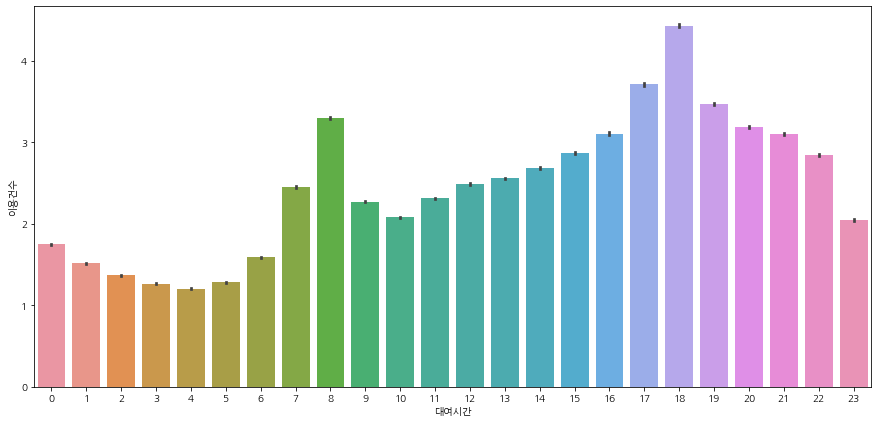

In [ ]:
def barplots(x,y):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,data=df);
barplots('대여시간','이용건수')

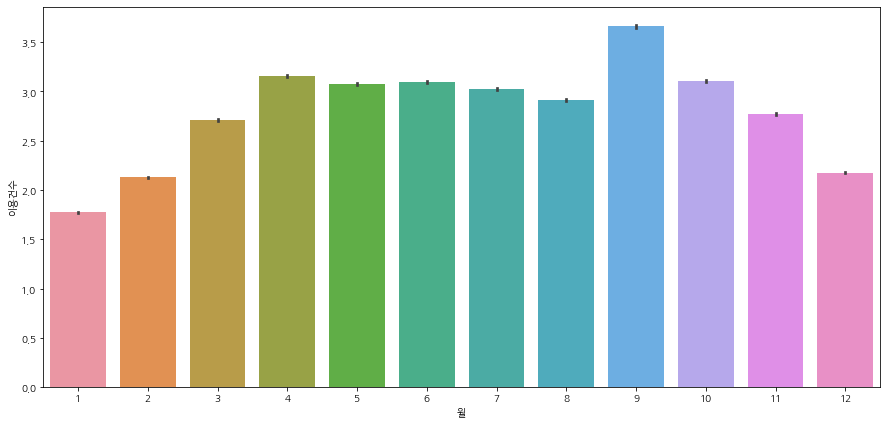

In [ ]:
barplots('월', '이용건수')

Text(0.5, 1.0, 'cube root')

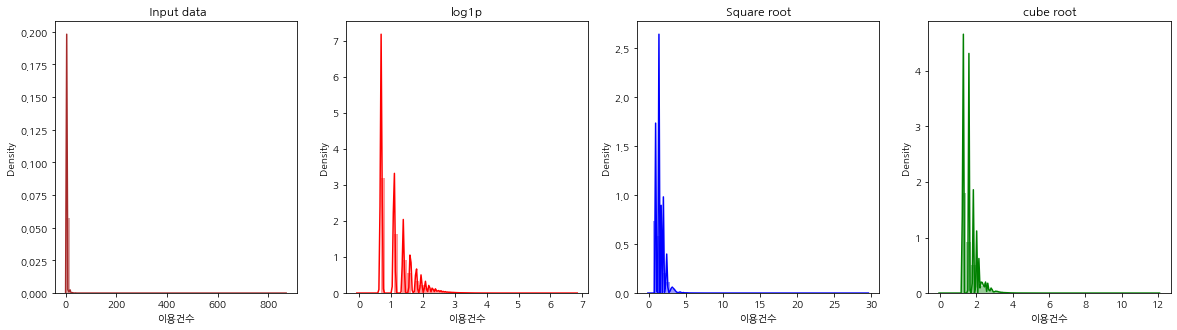

In [ ]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((df['이용건수']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(df['이용건수']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(df['이용건수']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(df['이용건수']*2),ax=axes[3], color='green').set_title("cube root")

In [ ]:
df.head()

,대여소번호,소재지(위치),월,일,대여시간,요일,기온(°C),풍속(m/s),강수량(mm),습도(%),이동거리,사용시간,이용건수
0,102,마포구,1,1,0,4,-8.3,1.8,0.0,66,0.000000,6.000000,1.0
1,102,마포구,1,1,10,4,-6.1,1.1,0.0,68,936.080000,5.000000,1.0
2,102,마포구,1,1,11,4,-3.2,1.7,0.0,55,4152.220000,22.000000,1.0
3,102,마포구,1,1,12,4,-1.1,2.1,0.0,52,0.000000,35.333333,3.0
4,102,마포구,1,1,14,4,1.4,1.6,0.0,53,640.383333,19.000000,3.0
